# DeLong and Olney Macroeconomics 3rd Edition ch 4.3 Understanding the Solow Growth Model

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# set up the environment by reading in every library we might need: 
# os... graphics... data manipulation... time... math... statistics...

import sys
import os
from urllib.request import urlretrieve

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime

import scipy as sp
import numpy as np
import math
import random

import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# report library versions...

/Users/delong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
%matplotlib inline 

# put graphs into the notebook itself...

In [5]:
# graphics setup: seaborn-whitegrid and figure size...

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 10
plt.rcParams["figure.figsize"] = figure_size

# 4.3 Solving the Solow Growth Model

## 4.3.1 Getting an Exploratory Sense of How the Model Behaves

The two simulation runs presented above both made the hugely unrealistic assumptions of no labor force growth and no growth in the efficiency of labor. How does the model behave if we relax those unrealistic assumptions, and incorporate labor force and efficiency of labor growth? We can see the same way we saw above: assume various parameter values and initial conditions, and see what happens. Back when Robert Solow originally developed his model, computer time was so expensive that the only way to gain understanding was to solve the algebra and then think. Now, however, (as long as our programs run without bugs) we can directly see. Figure 4.14 presents the behavior of the model for the same parameter values as above, only with labor force growth at 1% per year and labor efficiency growth at 2% per year.

This time the economy does not stagnate: there is no tendency for the economy's level of output or of output per worker or of the capital stock to head for some asymptote where they then stick. And there should not be. This model was built to understand the ongoing and—so far—fairly constant proportional growth that modern industrial economies have experienced since the Industrial Revolution. If our model predicted some eventual cessation of growth and subsequent stagnation, either we would have been doing it wrong, or it would be huge news. Indeed, there is no reason for output per worker to stagnate: labor is becoming more efficient and productive, and the other productive resource in the economy is capital, which is something labor can and does create. And with both efficiency and with both labor efficiency and the labor force increasing, there is no reason for output growth to approach any end. And with output increasing and savings a constant share of output, we would expect the capital stock to grow too.

----

&nbsp;

**Figure 4.3.1: Solow Model Simulation: 2% Annual Efficiency of Labor Growth, 1% Annual Labor Force Growth**

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401bb09ed6fd7970d-pi" alt="Full model run" title="full_model_run.png" border="0" width="600" />

α = 1/2, δ = 3%, s = 15%

----

&nbsp;

In [6]:
# we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...

def sgm_200yr_run(L0, E0, K0, n=0, g=0, s=0.15, alpha=0.5, delta=0.03, T=200):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.Capital[0] = K0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]

    for i in range(T):
        sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
        sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
        sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]

        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(3,2,1)
    sg_df.Labor.plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Parameters")

    ax2 = plt.subplot(3,2,2)
    sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")

    ax3 = plt.subplot(3,2,3)
    sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
    plt.ylabel("Values")

    ax4 = plt.subplot(3,2,4)
    sg_df.Output.plot(ax = ax4, title = "Output")

    ax5 = plt.subplot(3,2,5)
    sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylabel("Ratios")

    ax6 = plt.subplot(3,2,6)
    sg_df.Capital_Output_Ratio.plot(ax = ax6, title = "Capital-Output Ratio")
    plt.xlabel("Years")

    plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

    plt.show()
    
    print(n, "is the labor force growth rate")
    print(g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")

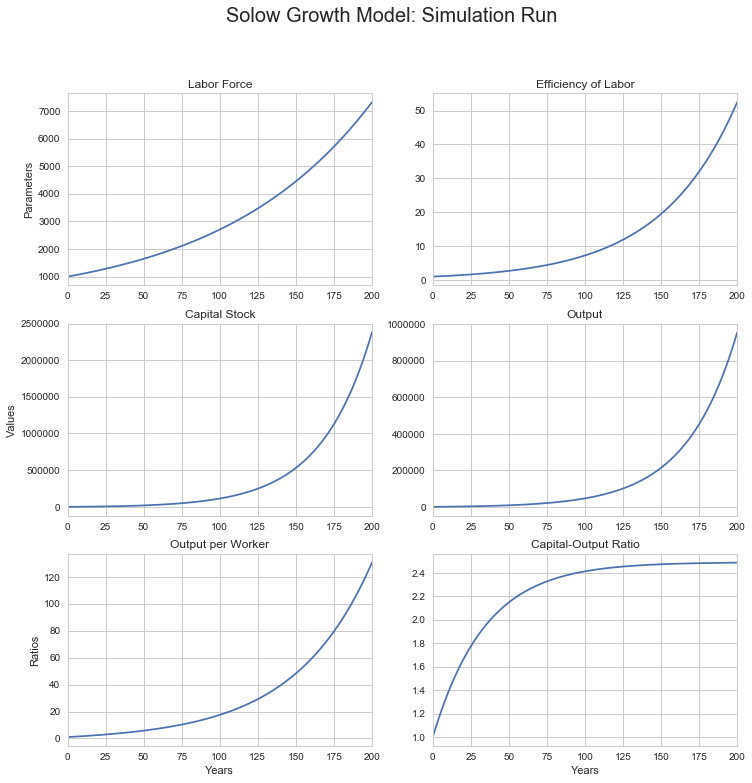

0.01 is the labor force growth rate
0.02 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.15 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [7]:
# Now let's start with a low initial capital stock, and with
# growth in workers and in efficiency...

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 1000, g = 0.02, n = 0.01,
    s = 0.15)

----

&nbsp;

Only one economic variable plotted in Figure 4.3.1 seems to be approaching any sort of limit or asymptote: the capital-output ratio. Is that a special feature of the particular initial conditions we chose? Let's choose a different set of initial conditions and see. 

Figure 4.3.2 plots a simulation run starting with a very high initial capital stock. In its first few periods the simulated economy is behaving substantially differently. The capital stock is not rising but falling, as depreciation overwhelms gross investment. Output per worker is falling as well, as increased efficiency of labor cannot keep up with the reduction in the buildings, machines, and inventories the average worker has at his or her disposal. The capital-output ratio is falling very rapidly at the start.

But by the end of the simulation run, the economy is at the same place in Figure 4.3.2 that it was in Figure 4.2.1. Whatever influence the initial conditions had on the state of the economy has been erased. That the labor force and the efficiency of labor are at the same levels and have the same growth rates is no surprise: that is compelled by the basic setup. But the capital stock, the level of output, the level of output per worker, and the capital-output ratio—all were very different in the first, initial years. And the capital-output ratio is approaching the same steady-state asymptote in Figure 4.3.2 that it had approached in Figure 4.3.1. 

----

&nbsp;

**Figure 4.3.2: Solow Simulation Run with High Initial Capital Stock**

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401b7c94a26e7970b-pi" alt="High Initial Capital Stock" title="High_Initial_Capital_Stock.png" border="0" width="600" />

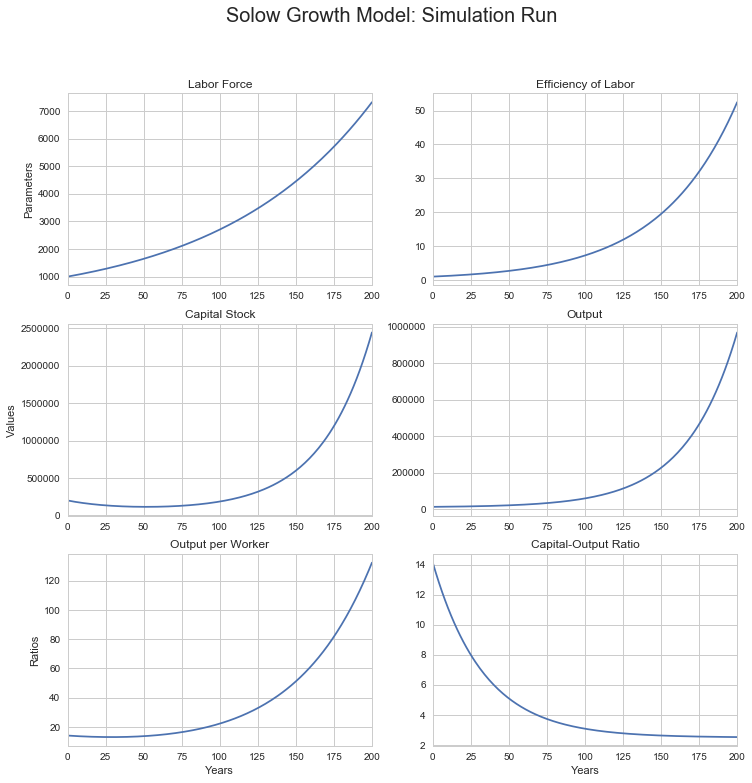

0.01 is the labor force growth rate
0.02 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.15 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [8]:
sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 200000, g = 0.02, n = 0.01,
    s = 0.15)

----

&nbsp;

## 4.3.2 Analyzing the Solow Model

### 4.3.2.1 Balanced Growth

Earlier, when we had assumed that labor force and efficiency were both constant, and thus that n and g were both equal to 0, our equilibrium condition was K/Y = s/δ. Since the saving-investment rate s and the depreciation rate δ were both constant, our equilibrium condition required that the capital-output ratio K/Y be constant as well. There was where the economy was in equilibrium, in balance, with a stable level of not only the capital-output ratio but of the capital stock and output as well.

Now we have added more realism back into our model by allowing the labor force and labor efficiency to both increase over time, at their constant rates n and g. This should, one would think, change how the economy behaves—and it would change the equilibrium condition that we look at to understand in which directions the economic variables of interest are changing.

What effect does this added realism—allowing n and g to take on values other than 0—have on our equilibrium condition that the capital-output ratio be stable?

In an important sense: None! Our equilibrium condition is, in a sense, the same: that the capital-output ratio be constant. But this time, when the capital-output ratio is constant the economy's equilibrium is not one of stable and stagnant balance but rather one of _balanced growth_. Output per worker is then growing at the same rate as the capital stock per worker. Output is growing and the same rate as the capital stock. The former two per worker variables are in balance, and they are both growing at the same rate as the efficiency of labor. The latter two economy-wide aggregate variables are in balance, and they are growing at the same rate as the sum of labor efficiency growth and labor force growth.

----

&nbsp;

**Box 4.3.1: Some Easy Mathematical Tools**

This is a good place to introduce four mathematical rules of thumb to make life easier. They are all only approximations. But they are good enough for our purposes. They are:

1. The growth-of-a-product rule: The growth rate of a product is equal to the sum of the growth rates of its components. Since total output Y is equal to output per worker Y/L times the number of workers L, the growth rate of total output Y will be equal to the growth rate of Y/L plus the growth rate of L.

2. The growth-of-a-quotient rule: The proportional change of a quotient is equal to the difference between the proportional changes of its components. Since output per worker Y/L is equal to the quotient of output Y and the number of workers L, its growth rate will be the difference between their growth rates.

3. The growth-of-a-power rule: The proportional change of a quantity raised to a power is equal to the proportional change in the quantity times the power to which it is raised. For example, suppose that we have a situation in which output Y is equal to the capital stock K raised to the power a: Y = Ka. Then the growth rate of Y will be equal to a times the growth rate of K.

4. The rule of 12: A quantity growing at k percent per year doubles in 72/k years. A quantity shrinking at k percent per year halves itself in 72/k years.

You may hear people say that a background in calculus is needed to understand intermediate macroeconomics. That is not true. These four mathematical rules of thumb contain 95 percent of what calculus is used for in intermediate macro  economics. (Of course, you do need calculus if you want to do more than just take them on faith, and instead have a deep understanding of just why these rules of thumb work.)

----

&nbsp;

### 4.3.2.2 The Balanced Growth Capital-Output Ratio

But at what value will the economy’s capital-output ratio be constant? Here is where allowing n and g to take on values other than 0 matters. The capital-output ratio will be constant—and therefore we’ll be in balanced-growth equilibrium — when K/Y = s/(n + g + δ). Add up the economy’s labor-force growth rate, efficiency-of-labor growth rate, and depreciation rate; divide the saving-investment rate by that sum; and that is your balanced-growth equilibrium capital-output ratio.

Why is s/(n + g + δ) the capital-output ratio in equilibrium? Think of it this way: Suppose the economy is in balanced growth. How much is it investing? There must be investment equal to δK to replace depreciated capital. There must be investment equal to nK to provide the extra workers in the labor force, which is expanding at rate n, with the extra capital they will need. And, since the efficiency of labor is growing at rate g, there must be investment equal to gK in order for the capital stock to keep up with increasing efficiency of labor.

Adding these three parts of investment requirements together and setting the sum equal to the gross investment sY actually going on gets us to:

(4.3.1)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ (n + g + δ)K = sY   $

This is a condition for capital and output to be in balance—for savings at that capital-output ratio to be such so to equal the investment requirements for capital and output to grow at the same rate. Thus the economy’s investment requirements for balanced growth equal the actual flow of investment when the capital-ouput ratio is:

(4.3.2)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{K}{Y}\right)_* = \frac{s}{n+g+δ}  $

Where we add the star (\*) to denote that this is an _equilibrium condition_: this is not the current capital-output ratio, but rather the equilibrium capital-output ratio: the one toward which the economy is heading and at which it will rest.

This, equation (4.3.2) is thus the balanced-growth equilibrium condition. 

When it is attained, what the capital-output ratio K/Y will be is constant because s, n, g, and δ are all constant. So when there is balanced growth—when output per worker Y/L and capital per worker K/L are growing at the same rate—the capital-output ratio K/Y will be constant. If the capital-output ratio K/Y is lower than s/(n + g + &delta;), then depreciation (&delta;K) plus the amount (n + g)K that capital needs to grow to keep up with growing output will be less than investment (sY), so the capital-output ratio will grow. It will keep growing until K/Y reaches s/(n + g + &delta;). If the capital-output ratio K/Y is greater than s/(n + g + &delta;), then depreciation (&delta;K) plus the amount (n + g)K that capital needs to grow to keep up with growing output will be greater than investment (sY), so the capital-output ratio will shrink. It will keep shrinking until K/Y falls to s/(n + g + &delta;). 

----

&nbsp;

### 4.3.2.3 Some Algebra

To see more formally that K/Y = s/(n + g + δ) is the balanced-growth equilibrium condition requires a short march through algebra—simple algebra, we promise. Start with the production function in its per worker form:

(4.3.3)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \left(\frac{K}{L}\right)^α \left(E\right)^{1-α} $

Break the capital-labor ratio down into the capital-output ratio times output per worker:

(4.3.4)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \left(\frac{K}{Y}\frac{Y}{L}\right)^α \left(E\right)^{1-α} $

Regroup:

(4.3.5)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \left(\frac{Y}{L}\right)^α\left(\frac{K}{Y}\right)^α \left(E\right)^{1-α} $

Collect terms:

(4.3.6)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right)^{1-α} = \left(\frac{K}{Y}\right)^α \left(E\right)^{1-α} $

And clean up:

(4.3.7)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right) = \left(\frac{K}{Y}\right)^{\frac{α}{1-α}} \left(E\right) $

This tells us that _if the capital-output ratio K/L is constant, then the proportional growth rate of output per worker is the same as the proportional growth rate of E_. And the proportional growth rate of labor efficiency E is the constant g. 

Recall  that the labor force is growing at a constant proportional rate n. With output per worker growing at rate g and the number of workers growing at rate n, total output is growing at the constant rate n + g. Thus for the capital-output ratio K/Y to be constant, the capital stock also has to be growing at rate n + g. 

This means that the annual change in the capital stock must be: (n + g)K. Add in investment necessary to compensate for depreciation, and that is why we have:

(4.3.2)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{K}{Y} = \frac{s}{n+g+δ}  $

as our balanced-growth equilibrium condition.

----

&nbsp;

### 4.3.2.4 From Algebra Back to Economics

In economic terms, the balanced-growth equilibrium capital-output ratio is equal to the share of production that is saved and invested for the future—the economy’s saving-investment rate s—divided by the sum of three things:

* The growth rate of the labor force n.
* The growth rate of the efficiency of labor g.
* The depreciation rate δ at which capital breaks down and wears out.

We’ll sometimes call s/(n + g + δ) the “equilibrium” capital-output ratio, and we’ll sometimes call it the “balanced-growth” capital-output ratio. To be always saying “balanced-growth equilibrium” capital-output ratio is too much of a mouthful.

How do we know K/Y = s/(n + g + δ) gives us balanced growth, where capital per worker K/L and output per worker Y/L grow at the same rate? Suppose the current capital-output ratio is lower than s/(n + g + δ). Then (n + g + δ)K would be less than the economy’s total investment which is equal to sY, the saving rate s times the level of output Y. Thus saving and investment will more than provide new workers with the capital they need to be fully productive, more than cover the increase in output due to the increase in labor efficiency, and more than com  pensate for the wearing out of capital through depreciation. The capital stock would grow faster than n + g. Since n + g is the rate at which output grows, the capital-output ratio would rise.

Suppose instead the current capital-output ratio were above s/(n + g + δ). Then sY will be less then the economy’s total investment sY will be insufficient to keep the capital stock growing at rate n + g. And since n + g is the rate at which output grows, the capital-output ratio will fall.

Thus a capital-output ratio greater than s/(n + g + δ) makes the capital-output ratio fall. And a capital-output ratio less than s/(n + g + δ) makes the capital- output ratio rise. So a capital-output ratio equal to s/(n + g + δ) is indeed the balanced-growth equilibrium condition.

We have now solved our Solow growth model.

It delivers one equilibrium condition: telling us that the stable capital-output ratio will be s/(n + g + δ), and that the economy will evolve over time to reduce the gap between the current capital-output ratio K/Y and its equilibrium balanced-growth value.

It consists of five behavioral relationships:

* A production function.
* A rate of labor-force growth: n.
* A rate of growth in the efficiency of labor: g.
* A rate of depreciation of capital: δ.
* The saving-investment rate: s.

“Bob Solow got the Nobel Prize for that?!” you may ask. Ah, but what he got the Nobel Prize for was taking a complicated subject and making a useful model of it that was very simple indeed. The model is simple to write down. But it is powerful. And now we get to use it to generate  insights.

----

&nbsp;

## 4.3.3 Understanding the Solow Model

### 4.3.3.1 Deriving the Balanced Growth Path for Output per Worker

Along what path for output per worker will the balanced-growth equilibrium condition be satisfied? Y/L is, after all, our best simple proxy for the economy’s overall level of prosperity: for material standards of living and for the possession by the economy of the resources needed to diminish poverty. Let’s calculate the level of output per worker Y/L along the balanced-growth path.

Begin with the capital-output ratio version of the production function that we just calculated above:

(4.3.7)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right) = \left(\frac{K}{Y}\right)^{\frac{α}{1-α}} \left(E\right) $

Since the economy is on its balanced-growth path, it satisfies the equilibrium con  dition K/Y = s/(n + g + δ). Substitute that in:

(4.3.8)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right) = \left(\frac{s}{n+g+δ}\right)^{\frac{α}{1-α}} \left(E\right) $

s, n, g, δ, and α are all constants, and so [s/(n + g + δ)]<sup>(α/(1-α))</sup>;is a constant as well. This tells us that along the balanced-growth path, output per worker is simply a constant multiple of the efficiency of labor, with the multiple equal to:

(4.3.9)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{s}{n+g+δ}\right)^{\frac{α}{1-α}}  $

Over time, the efficiency of labor grows. Each year it is g percent higher than the last year. Since along the balanced-growth path output per worker Y/L is just a constant multiple of the efficiency of labor, it too must be growing at the same proportional rate g.

Now it is time to introduce time subscripts, for we want to pay attention to where the economy is now, where it was whence, and where it will be when. So rewrite (4.3.8) as:

(4.3.8')&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y_t}{L_t}\right) = \left(\frac{s}{n+g+δ}\right)^{\frac{α}{1-α}} \left(E_t\right) $

Paying attention to the equations for how labor efficiency and the labor force grow over time, $ E_t = E_0(1 + g)^t  $ and $ L_t = L_0(1 + n)^t  $, we can plug in and solve for what Y/L and Y will be at any time t—as long as the economy is on its balanced-growth path.

----

&nbsp;

**Box 4.3.2: Along the Balanced-Growth Path, Output per Worker Is a Constant Multiple of the Efficiency of Labor**

Along its balanced-growth path, the level of output per worker is a constant multiple of the efficiency of labor. What that multiple is depends on all the parameters of the growth model: the saving rate s, the labor-force growth rate n, the efficiency-of-labor growth rate g, the depreciation rate δ, and the diminishing-returns-to-investment parameter α. The equation is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y_t}{L_t} = \left(\frac{s}{n+g+\delta}\right)^\left(\frac{\alpha}{1-\alpha}\right)E_t  $

with:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ E_t = E_0{(1 + g)^t}  $

----

&nbsp;

**Figure 4.3.3: Output per Worker and the Efficiency of Labor on the Balanced Growth Path**

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401b7c94d7d3a970b-pi" alt="Output per Worker a Constant Multiple" title="Output_per_Worker_a_Constant_Multiple.png" border="0" width="600" />



----

&nbsp;

### 4.3.3.2 Interpreting the Balanced Growth Path for Output per Worker

We now see how capital intensity and technological and organizational progress drive economic growth. Capital intensity—the economy’s capital-output ratio—determines what is the multiple of the current efficiency of labor E that balanced-growth path output per worker Y/L is. Things that increase capital intensity—raise the capital-output ratio—make balanced-growth output per worker a higher multiple of the efficiency of labor. Thus they make the economy richer. Things that reduce capital intensity make balanced-growth output per worker a lower multiple of the efficiency of labor, and so make the economy poorer.

Suppose that α is 1/2, so that α/(l—α) is 1, and that s is equal to three times n + g + δ, so that the balanced-growth capital-output ratio is 3. Then balanced-growth output per worker is simply equal to three times the efficiency of labor. If we consider another economy with twice the saving rate s, its balanced-growth capital-output ratio is 6, and its balanced-growth level of output per worker is twice as great a multiple of the level of the efficiency of labor.

The higher is the parameter α—that is, the slower diminishing returns to investment set in—the stronger is the effect of changes in the economy’s balanced-growth capital intensity on the level of output per worker, and the more important are thrift and investment incentives and other factors that influence s relative to those that influence the efficiency of labor.

* Suppose that the balanced-growth capital-output ratio is 4. Then if α is 1/3, α/(1—α) is 1/2, and the balanced-growth path level of output per worker is twice the level of the efficiency of labor, as you then multiply the efficiency of labor by the square root of the capital-output ratio. Most economists think that 1/3 is a reasonable parameter value for the United States today.

* By contrast, if α is 1/2, α/(l—α) is equal to 1, and again with a balanced-growth capital-output ratio of 4, the level of output per worker is fully four times the level of the efficiency of labor, as you then multiply the efficiency of labor by the capital-output ratio.. Most economists think that 1/2 is a reasonable parameter value for the United States a century ago or for relatively poor countries today.

* But some economists—for example, Paul Romer, currently of the World Bank—believe that the evidence points at still higher values of α. If α = 2/3, and again with a balanced-growth capital-output ratio of 4, the level of output per worker is fully sixteen times the level of the efficiency of labor, as you then multiply the efficiency of labor by the square of the capital-output ratio.

Note—this is important-that changes in the economy’s capital intensity shift the balanced-growth path up or down to a different multiple of the efficiency of labor, but the growth rate of Y/L along the balanced-growth path is simply the rate of growth g of the efficiency of labor E. The material standard of living grows at the same rate as labor efficiency. 

To change the very long run growth rate of the economy you need to change how fast the efficiency of labor grows. Changes in the economy that merely alter the capital-output ratio will not do it. They can have a large effect on the level. 

This is what tells us that technology, organization, worker skills, education—all those things that increase the efficiency of labor and keep on increasing it—are likely to be ultimately more important to growth in output per worker than saving and investment. The U.S. economy experienced a large increase in its capital-output ratio in the late nineteenth century. It may be experiencing a similar increase now, as we invest more and more in computers. But the Gilded Age industrialization came to an end, and the information technology revolution will run its course. Aside from these episodes, it is growth in the efficiency of labor E that sustains and accounts for the lion’s share of long-run economic growth.

----

&nbsp;

**Box 4.3.3: Calculating Balanced Growth Path Output per Worker: An Example**

To see how to use the expression for output per worker when the economy is on its balanced-growth path, let’s work through an example. 

Suppose that the economy’s labor-force growth rate n is 1 percent per year, the efficiency-of-labor growth rate g is 2 percent per year, and the depreciation rate δ is 3 percent per year. Suppose further that the diminishing-returns-to-investment parameter α is 1/2, and the economy’s saving-investment rate s is 18 percent.

Then the balanced-growth equilibrium capital-output ratio s/(n + g + δ) equals 3, and α/(l—α) equals 1. Substituting these values into equation (4.3.8) above:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y_t}{L_t} = \left(\frac{0.18}{0.06}\right)^\left(\frac{0.5}{1-0.5}\right)E_t  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y_t}{L_t} = \left(3\right)^\left(1\right)E_t  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y_t}{L_t} = 3(E_t)  $

For these parameter values, balanced-growth output per worker is simply three times the efficiency of labor, whatever the value of the efficiency of labor is. When the efficiency of labor is 10,000 per year, balanced-growth output per worker is 30,000 per year. When the efficiency of labor rises to 20,000 per year, balanced- growth output per worker rises to 60,000 per year.

Over time, because balanced-growth output per worker is a constant multiple of the efficiency of labor, its growth rate is the same as g, the growth rate of the efficiency of labor: 2 percent per year.

----

&nbsp;

The implications of the balanced-growth capital-output ratio for the balanced-growth level of output per worker, and how that level changes over time, can be seen in an alternative, diagrammatic way. Take a look at Figure 4.3.4. As before, draw the production-function curve that shows output per worker Y/L as a function of capital per worker K/L for the current level of the efficiency of labor Et. In addition, as before, draw the line that shows where the capital-output ratio is equal to its balanced-growth equilibrium value, K/Y = s/(n + g + δ). This line starts at the bottom left origin point (0, 0) and climbs toward the upper right. Because K/L is on the horizontal axis and Y/L is on the vertical axis, the slope of the line is not K/Y but instead Y/K or (n + g δ)/s

Look once again at where the curves cross. That point shows the current level of output per worker along the balanced-growth path. Output per worker is given by the production function for the current levels of capital per worker and the efficiency of labor. And the capital-output ratio is at its balanced-growth path level. Anything that increases the balanced-growth capital-output ratio will lower Y/K. Thus rotating the equilibrium line clockwise raising the balanced-growth path level of output per worker. Anything that decreases the balanced-growth capital output ratio rotates the equilibrium line counterclockwise. It thus lowers the level of output per worker for a given value of the efficiency of labor E.

----

&nbsp;

**Figure 4.3.4: Balanced Growth Path Output per Worker: Graphically**

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401b8d2d47336970c-pi" alt="Equilibrium Is Where the Curves Cross" title="Equilibrium_Is_Where_the_Curves_Cross.png" border="0" width="600" />

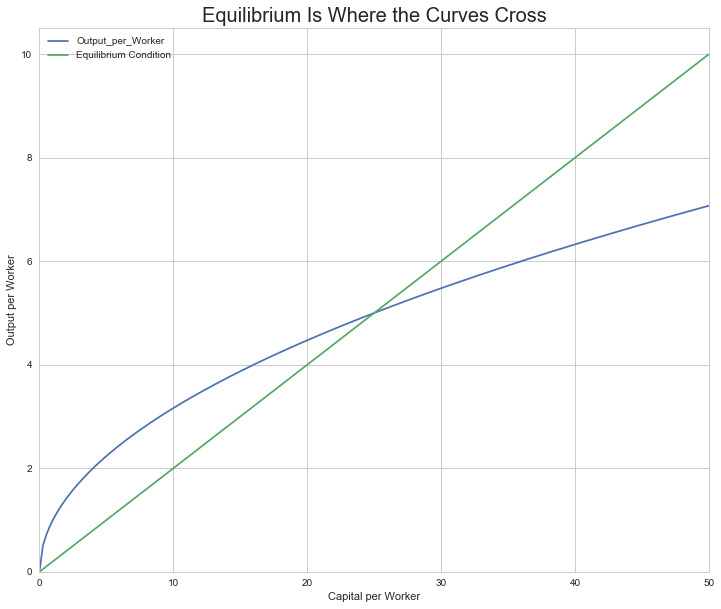

In [15]:
import numpy as np

delta = 0.035
n = 0.01
g = 0.015
s = 0.30
alpha = 0.5
E = 1

output_per_worker = np.zeros((201, 3))

for i in range(201):
    lowestkoverl = 0
    output_per_worker[i, 0] = lowestkoverl + i/4
    output_per_worker[i, 1] = (output_per_worker[i, 0] ** alpha) * E**(1-alpha)
    output_per_worker[i, 2] = (delta+n+g)/s * output_per_worker[i, 0]
output_per_worker_df = DataFrame(data = output_per_worker, 
    columns = ["Capital_per_Worker", "Output_per_Worker", 
        "Equilibrium Condition"])

output_per_worker_df.set_index('Capital_per_Worker').plot()
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.ylim(0, )

plt.title("Equilibrium Is Where the Curves Cross", size = 20)

Over time the efficiency of labor increases. As the efficiency of labor increases, the production-function curve in Figure 4.3.5 will shift up and out to the right. Over time, therefore, the balanced-growth path equilibrium levels of output per worker and capital per worker levels will rise as the economy climbs up and to the right along the constant balanced-growth equilibrium line.

----

&nbsp;

**Figure 4.3.6: Balanced Growth Path Output per Worker: Graphically: For E = 1/2, E =1, and E = 2**

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401b7c94d7f7a970b-pi" alt="Where the curves cross" title="where_the_curves_cross.png" border="0" width="600" height="505" />

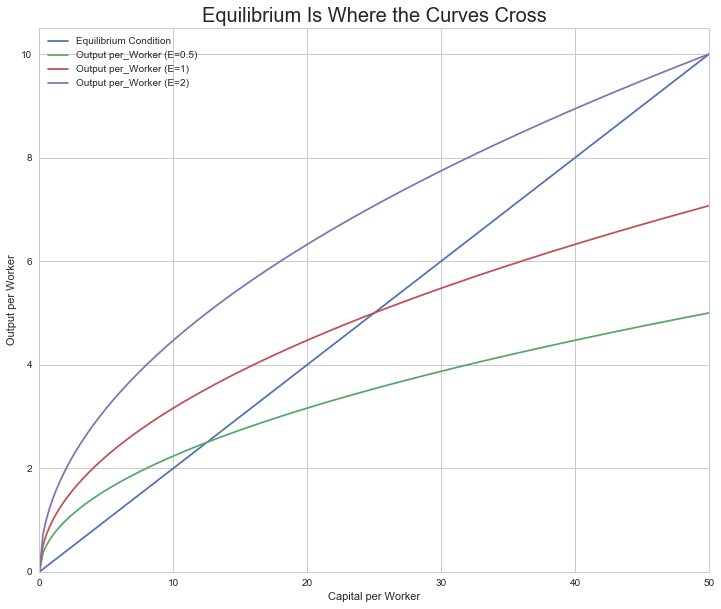

In [16]:
import numpy as np

delta = 0.035
n = 0.01
g = 0.015
s = 0.30
alpha = 0.5

Eh = 1/2
E1 = 1
E2 = 2

output_per_worker = np.zeros((201, 5))

for i in range(201):
    lowestkoverl = 0
    output_per_worker[i, 0] = lowestkoverl + i/4
    output_per_worker[i, 1] = (delta+n+g)/s * output_per_worker[i, 0]
    output_per_worker[i, 2] = (output_per_worker[i, 0] ** alpha) * Eh**(1-alpha)
    output_per_worker[i, 3] = (output_per_worker[i, 0] ** alpha) * E1**(1-alpha)
    output_per_worker[i, 4] = (output_per_worker[i, 0] ** alpha) * E2**(1-alpha)
    
output_per_worker_df = DataFrame(data = output_per_worker, 
    columns = ["Capital_per_Worker", "Equilibrium Condition", 
    "Output per_Worker (E=0.5)", "Output per_Worker (E=1)",
    "Output per_Worker (E=2)"])

output_per_worker_df.set_index('Capital_per_Worker').plot()
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.ylim(0, )

plt.title("Equilibrium Is Where the Curves Cross", size = 20)

----

&nbsp;

### 4.3.3.3 Off the Balanced Growth Path

To calculate what output per worker would be if the economy were to be on its balanced-growth path is a straightforward three-step procedure:

1. Calculate the balanced-growth equilibrium capital-output ratio s/(n + g + δ), the saving rate s divided by the sum of the labor-force growth rate n, the efficiency of labor growth rate g, and the depreciation rate δ.
2. Raise the balanced-growth capital-output ratio to the α/(l-α) power, where α is the diminishing-retums-to-investment parameter in the production function. 
3. Multiply the result by the current value of the efficiency of labor E. The result is the current value of what output per worker would be if the economy were on its balanced growth path, and the path traced out by that result as E grows over time is the balanced-growth path for output per worker.

But is this of use if the economy is not on its balanced growth path?

How can we use a model which assumes that the economy is on its balanced-growth path to analyze a sit  uation in which the economy is not on that path? We still can use the model—and this is an important part of the magic of economics—because being on the balanced-growth path is an equilibrium condition. In an economic model, the thing to do if an equilibrium condition is not satisfied is to wait and, after a while, look again. When we look again, it will be satisfied.

Whenever the capital-output ratio K/Y is above its balanced-growth equilibrium value s/(n + g + δ), K/Y is falling: Investment is insufficient to keep the capital stock growing as fast as output. Whenever K/Y is below its balanced-growth equilibrium value, K/Y is rising: Capital stock growth outruns output. And as the capital-output ratio converges to its balanced-growth value, so does the economy’s level of output per worker converge to its balanced-growth path.

The fact that an economy converges to its balanced-growth path makes analyzing the _long-run_ growth of an economy relatively easy as well even when the economy is not on its balanced-growth path:

1. Calculate the balanced-growth path.
2. From the balanced-growth path, forecast the future of the economy: If the economy is on its balanced-growth path today, it will stay on that path in the future (unless some of the parameters—n, g, δ, s, and α—change).
3. If those parameters change, calculate the new, shifted balanced-growth path and predict that the economy will head for it.
4. If the economy is not on its balanced-growth path today, it is heading for that path—and will get there, eventually.

Thus _long run_ economic forecasting becomes simple. All you have to do is predict that the economy will head for its balanced-growth path, and calculate what the balanced-growth path is.

----

&nbsp;

### 4.3.3.4 Converging to the Balanced Growth Path

How fast does an economy head for its balanced-growth path? Does the convergence of an economy following the Solow growth model to its balanced-growth path take a year, or five years, or is it a matter of decades?

It is a matter of decades. But to see this requires more algebra:

Those of you for whom calculus is a tool and an intellectual force multiplier rather than a ritualistic obstacle to thought can start with the output form of the production function:

(4.3.9)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = K^α(EL)^{(1-α)}  $

Take first logarithms, and then derivatives to obtain:

(4.3.10)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\frac{d(ln(Y_{t}))}{dt} = \alpha\frac{d(ln(K_t))}{dt} + (1-\alpha)\frac{d(ln(E_t))}{dt} + (1-\alpha)\frac{d(ln(L_t))}{dt}$

Note that since the derivative of a logarithm is simply a proportional growth rate, that (4.3.10) is an equation that tells us that—on or off of the balanced-growth path—the proportional growth rate of output is a function of the parameter α and of the growth rates of the capital stock, the labor force, and the efficiency of labor.

To keep those of you for whom math is not so much a tool and intellectual force multiplier on the same page, we are simply going to write "g<sub>x</sub>" for the proportional growth rate of an economic variable X. Thus g<sub>Y</sub> is the proportional growth rate of output Y. g<sub>K</sub> is the proportional growth rate of the capital stock K. And so forth. 

(4.3.10) can then become a friendlier form: an equation about growth rates, an equation the truth of which isbuilt into the definitions of logarithms, proportional growth rates, and the Cobb-Douglas production function:

(4.3.10')&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ g_Y = αg_K + (1-α)g_L + (1-α)g_E  $

We know what the proportional growth rates of the labor force L and labor efficiency E are in the Solow model: they are n and g:

(4.3.11)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ g_Y = αg_K + (1-α)(n + g)  $

Now subtract both sides of this from the growth rate of the capital stock:

(4.3.12)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ g_K - g_Y = (1-α)g_K - (1-α)(n + g)  $

We are almost done. Then to determine what the growth rate of the capital stock is, we simply take its change, sY - δK, and divide it by its level, K—but only on the right hand side:

(4.3.13)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ g_K - g_Y = (1-α)\left(s\left(\frac{Y}{K}\right) - δ\right) - (1-α)(n + g)  $

The proportional growth rate of the quotient of two variables is just the difference between the proportional growth rates of the numerator and the denominator. Thus the left hand side is:

(4.3.14)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ g_{K/Y} = (1-α)s\left(\frac{Y}{K}\right) - (1-α)(n + g + δ)  $

And since the proportional growth rate of a variable is its rate of change divided by its level, the left hand side is:

(4.3.15)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{d(K/Y)/dt}{K/Y} = (1-α)s\left(\frac{Y}{K}\right) - (1-α)(n + g + δ)  $

Getting rid of the denominator on the left-hand side:

(4.3.16)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{d(K/Y)}{dt} = (1-α)s - (1-α)(n + g + δ)\left(\frac{K}{Y}\right)  $

(4.3.17)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{d(K/Y)}{dt} = - (1-α)(n + g + δ)\left(\frac{K}{Y} - \frac{s}{n + g + δ}\right)  $

This equation tells us three things:

* When the capital-output ratio K/Y is equal to s/(n+g+δ), it is indeed the case that it is stable.

* When K/Y is above that s/(n+g+δ) value, it is falling; when it is below, it is rising.

* The speed with which it is falling or rising is always proportional to the gap between K/Y and s/(n+g+δ), with the factor of proportionality equal to (1-α)(n+g+δ)

----

&nbsp;

**Figure 4.3.7: Convergence to a Balanced-Growth Path Capital-Output Ratio of 4**

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401bb09f0e868970d-pi" alt="Convergence" title="Convergence.png" border="0" width="600" height="463" />

Suppose the balanced- growth equilibrium capital-output ratio is 4. Whether the capital-output ratio starts above or below its balanced-growth equilibrium value, it converges to the level equal to s/(n + g + δ)

----

&nbsp;

### 4.3.3.5 Solving for the Time Path of the Capital-Output Ratio

This march through algebra has just confirmed the arguments made so far. So what extra good—besides serving as a check on correctness—has this algebra done us?

It has done us good because equation (4.3.17) is a very special equation: it has a rate of change of something on the left hand side. It has the level of something on the right hand side. It has a negative constant multiplying the level. It is a _convergent exponential_. The function that satisfies this equation is:

(4.3.18)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{K_t}{Y_t} = \frac{s}{\delta + n + g} + \left(C - \frac{s}{\delta + n + g}\right) e^{-(1 - \alpha)(\delta + g + n)t}  $

for the appropriate constant C.

What is the value of this constant C? Well, we know what the capital-output ratio is right now, when we start our analysis, which we might as well take to be the time t = 0. If we do take now to be time t = 0, and take K<sub>0</sub>/Y<sub>0</sub> for the capital output tday, then we can substitute in for the constant C:

(4.3.19)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{K_t}{Y_t} = \frac{s}{\delta + n + g} + \left(\frac{K_0}{Y_0} - \frac{s}{\delta + n + g}\right) e^{-(1 - \alpha)(\delta + g + n)t}  $

And:

(4.3.20)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\frac{Y_t}{L_t} = \left(\frac{s}{\delta + n + g} + \left(\frac{K_0}{Y_0} - \frac{s}{\delta + n + g}\right) e^{-(1 - \alpha)(\delta + g + n)t}\right)^\left(\frac{\alpha}{1-\alpha}\right)\left(E_t\right)  $

This tells us that, when it is off the equilibrium balanced-growth path, the capital-output ratio of a Solow growth model economy is a weighted average of (a) its initial capital-output ratio K<sub>0</sub>/Y<sub>0</sub> and (b) its long-run balanced-growth capital-output ratio s/(n+g+δ), with the weight placed on the first declining exponentially according to the function exp(-(1-α)(n + g + δ)t)

This tells us that, in the Solow growth model, an economy will close a fraction (1 — α)(n + g + δ) of the gap between its current position and the balanced-growth path each year. If α = 1/3, n = 1% per year, g = 1.5% per year, and δ = 3.5% per year, then (1 — α)(n + g + δ) turns out to be equal to 4% per year: 0.04. Then the capital-output ratio will close 4% percent of the gap between its current level and its balanced-growth value each year. According to the Rule of 72, an economy closing 4 percent of the gap between its current and its equilibrium value each year will move halfway to equilibrium in 72/4, or 18, years. It would close three-quarters of the gap in 36 years.

The Solow growth model is thus definitely a long-run model. It predicts that in the short run things will pretty much stay as they have been. If that is not right—if there are interesting and important fluctuations in the short run—the Solow model knows nothing about them. For them we will have to turn to the models of Chapter 6 and beyond.

In [9]:
# convergence to the balanced growth path
#
# we need to alter our dataframe in order to add a BGP line
#
# # we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...

def sgm_bgp_100yr_run(L0, E0, K0, n=0.01, g=0.02, s=0.15, alpha=0.5, delta=0.03, T = 100):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'BGP_Output',
        'BGP_Output_per_Worker',
        'BGP_Capital_Output_Ratio',
        'BGP_Capital'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.Capital[0] = K0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    sg_df.BGP_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_Output_per_Worker[0] = sg_df.Efficiency[0] * sg_df.BGP_Capital_Output_Ratio[0]*(alpha/(1 - alpha))
    sg_df.BGP_Output[0] = sg_df.BGP_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * sg_df.BGP_Capital_Output_Ratio[0]*(1/(1 - alpha))

    for i in range(T):
        sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
        sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
        sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]
        sg_df.BGP_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * sg_df.BGP_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha))
        sg_df.BGP_Output[i+1] = sg_df.BGP_Output_per_Worker[i+1] * sg_df.Labor[i+1]
        sg_df.BGP_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * sg_df.Efficiency[i+1] * sg_df.Labor[i+1]
        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(3,2,1)
    sg_df.Labor.plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Parameters")
    plt.ylim(0, )

    ax2 = plt.subplot(3,2,2)
    sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
    plt.ylim(0, )
    
    ax3 = plt.subplot(3,2,3)
    sg_df.BGP_Capital.plot(ax = ax3, title = "BGP Capital Stock")
    sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
    plt.ylabel("Values")
    plt.ylim(0, )

    ax4 = plt.subplot(3,2,4)
    sg_df.BGP_Output.plot(ax = ax4, title = "BGP Output")
    sg_df.Output.plot(ax = ax4, title = "Output")
    plt.ylim(0, )

    ax5 = plt.subplot(3,2,5)
    sg_df.BGP_Output_per_Worker.plot(ax = ax5, title = "BGP Output per Worker")
    sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylabel("Ratios")
    plt.ylim(0, )

    ax6 = plt.subplot(3,2,6)
    sg_df.BGP_Capital_Output_Ratio.plot(ax = ax6, title = "BGP Capital-Output Ratio")
    sg_df.Capital_Output_Ratio.plot(ax = ax6, title = "Capital-Output Ratio")
    plt.xlabel("Years")
    plt.ylim(0, )

    plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

    plt.show()
    
    print(n, "is the labor force growth rate")
    print(g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")

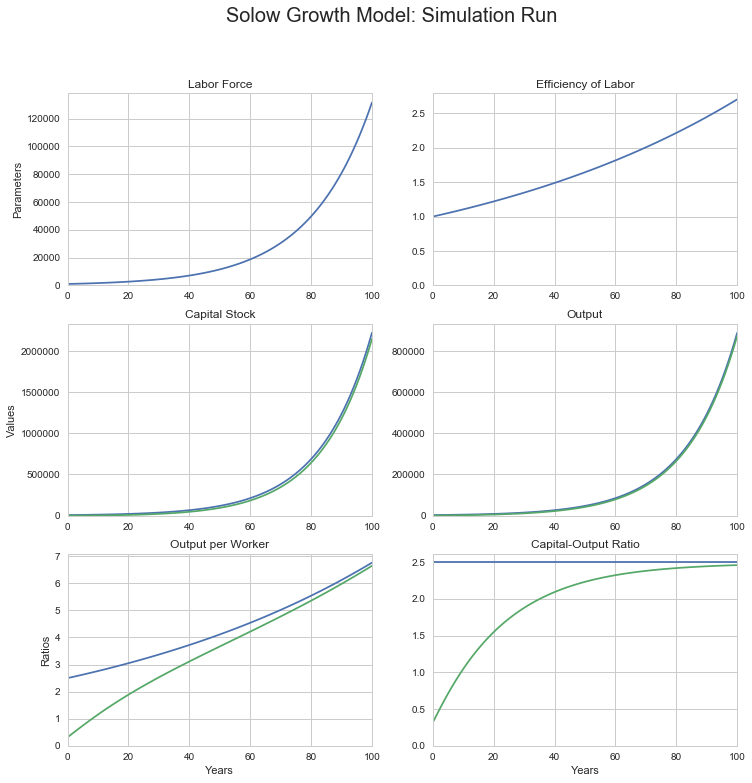

0.05 is the labor force growth rate
0.01 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.225 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [10]:
sgm_bgp_100yr_run(1000, 1, 100, n=0.05, g=0.01, s=0.225, alpha=0.5, delta=0.03)

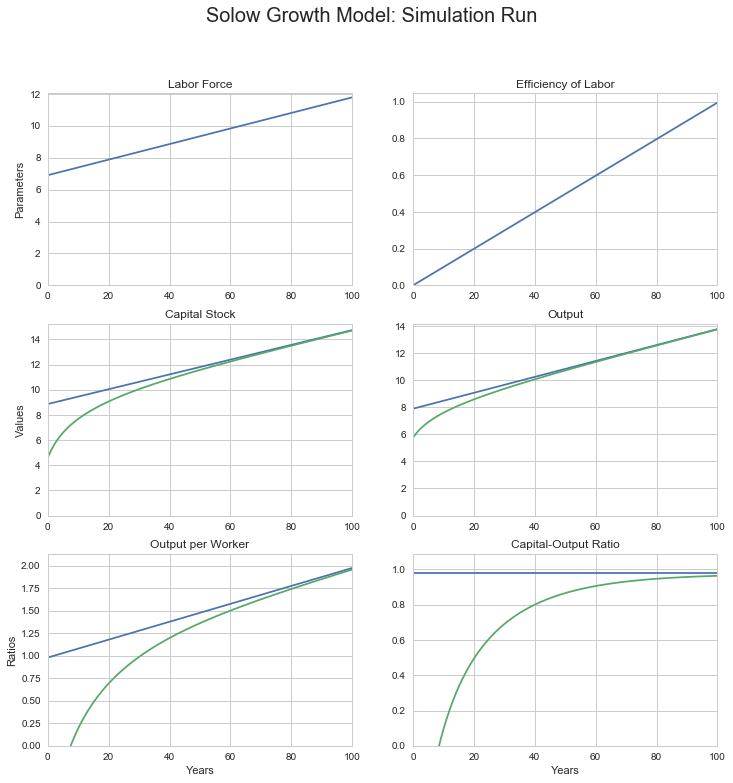

0.05 is the labor force growth rate
0.01 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.24 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [11]:
# convergence to the balanced growth path—log graphs
#
# we need to alter our dataframe in order to add a BGP line
#
# # we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...

def log_sgm_bgp_100yr_run(L0, E0, K0, n=0.01, g=0.02, s=0.15, alpha=0.5, delta=0.03, T=100):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'BGP_Output',
        'BGP_Output_per_Worker',
        'BGP_Capital_Output_Ratio',
        'BGP_Capital'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.Capital[0] = K0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    sg_df.BGP_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_Output_per_Worker[0] = sg_df.Efficiency[0] * sg_df.BGP_Capital_Output_Ratio[0]*(alpha/(1 - alpha))
    sg_df.BGP_Output[0] = sg_df.BGP_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_Capital[0] = (s / (n + g + delta))**(1/(1-alpha)) * sg_df.Efficiency[0] * sg_df.Labor[0]

    for i in range(T):
        sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
        sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
        sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]
        sg_df.BGP_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * sg_df.BGP_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha))
        sg_df.BGP_Output[i+1] = sg_df.BGP_Output_per_Worker[i+1] * sg_df.Labor[i+1]
        sg_df.BGP_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * sg_df.Efficiency[i+1] * sg_df.Labor[i+1]

        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(3,2,1)
    np.log(sg_df.Labor).plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Parameters")
    plt.ylim(0, )

    ax2 = plt.subplot(3,2,2)
    np.log(sg_df.Efficiency).plot(ax = ax2, title = "Efficiency of Labor")
    plt.ylim(0, )
    
    ax3 = plt.subplot(3,2,3)
    np.log(sg_df.BGP_Capital).plot(ax = ax3, title = "BGP Capital Stock")
    np.log(sg_df.Capital).plot(ax = ax3, title = "Capital Stock")
    plt.ylabel("Values")
    plt.ylim(0, )

    ax4 = plt.subplot(3,2,4)
    np.log(sg_df.BGP_Output).plot(ax = ax4, title = "BGP Output")
    np.log(sg_df.Output).plot(ax = ax4, title = "Output")
    plt.ylim(0, )

    ax5 = plt.subplot(3,2,5)
    np.log(sg_df.BGP_Output_per_Worker).plot(ax = ax5, title = "BGP Output per Worker")
    np.log(sg_df.Output_per_Worker).plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylabel("Ratios")
    plt.ylim(0, )

    ax6 = plt.subplot(3,2,6)
    np.log(sg_df.BGP_Capital_Output_Ratio).plot(ax = ax6, title = "BGP Capital-Output Ratio")
    np.log(sg_df.Capital_Output_Ratio).plot(ax = ax6, title = "Capital-Output Ratio")
    plt.xlabel("Years")
    plt.ylim(0, )

    plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

    plt.show()
    
    print(n, "is the labor force growth rate")
    print(g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")
    
log_sgm_bgp_100yr_run(1000, 1, 100, n=0.05, g=0.01, s=0.24, alpha=0.5, delta=0.03)

----

&nbsp;

**Box 4.3.4: How Fast Do Economies Converge?: An Example**

Consider an economy in which the rate of labor-force growth n = 1 percent per year, in which the efficiency of labor grows at a rate g = 2 percent per year, in which the depreciation rate δ = 5 percent per year, and in which the diminishing-returns-to-investment parameter α = 1/2.

This economy will, according to the Solow growth model, each year close a fraction of the gap between its current capital-output ratio and its balanced-growth capital-output ratio equal to:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ (1-\alpha)(n+g+\delta) = \left(1-\frac{1}{2}\right) (0.01+0.02+0.05) = 0.04  $

That is 4 percent per year. According to the rule of 72, the economy's capital-output ratio will close half of the gap to its balanced growth path value in 18 years.

----

&nbsp;

**Box 4.3.5: The Return of the West German Economy to Its Balanced-Growth Path**

Economies do converge to and then remain on their balanced-growth paths. The West German economy after World War II is a case in point.

We can see such convergence in action in many places and times. For example, consider the post-World War II history of West Germany. The defeat of the Nazis left the German economy at the end of World War II in ruins. Output per worker was less than one-third of its prewar level. The economy’s capital stock had been wrecked and devastated by three years of American and British bombing and then by the ground campaigns of the last six months of the war. But in the years immediately after the war, the West German economy’s capital-output ratio rapidly grew and con  verged back to its prewar value. As Figure 4.11 shows, within 12 years the West German economy had closed half the gap back to its pre-World War II growth path. And within 30 years the West German economy had effectively closed the entire gap between where it had started at the end of World War II and its balanced-growth path.

----

&nbsp;

**Figure 4.3.8: 

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401b8d2d7ee5e970c-pi" alt="German convergence" title="German_convergence.png" border="0" width="600" height="430" />

###### Source: J. Bradford DeLong and Barry Eichengreen, "The Marshall Plan: History's Most Successful Structural Adjustment Programme," in Rudiger Dornbusch, Willhelm Nolling, and Richard Layard, eds., Postwar Economic Reconstruction and Lessons for the East Today (Cambridge, MA: MIT Press, 1993), pp. 189-230.

----

&nbsp;

## 4.3.4 RECAP: Understanding the Solow Growth Model

**When the economy’s capital stock and its level of real GDP are growing at the same proportional rate, its capital-output ratio—the ratio of the econ  omy’s capital stock K to annual real GDP Y—is constant, and the economy is in balanced-growth equilibrium. In equilibrium, the capital-output ratio K/Y will equal the constant ratio s/(n + g + 8). The standard growth model analyzes how this balanced-growth equilibrium is determined by four factors: the economy’s saving-investment rate s, the economy’s labor-force growth rate n, the growth rate of the efficiency of labor g, and the capital stock depreciation rate 8.**

**According to the Solow growth model, capital intensity and growth in the efficiency of labor together determine the destiny of an economy. The value of the balanced-growth equilibrium capital-output ratio and the economy's diminishing-returns-to-investment parameter determine the multiple that balanced- growth output per worker is of the current efficiency of labor. The growth rate of output per worker along the economy’s balanced-growth path is equal to the growth rate of the efficiency of labor. And if the economy is not on its balanced-growth path, the Solow growth model tells us that it is converging to it—although this convergence takes decades, not years.**
 
----

&nbsp;

#### GLOSSARY

**Balanced growth**: When output per worker Y/L and capital per worker K/L are growing at the same rate.

**Balanced-growth path equilibrium steady-state capital- output ratio**: The value of the capital- output ratio to which an economy with constant saving rate, depreciation rate, labor-force growth rate, and efficiency growth rate converges overtime. Equal to s/(n + g + δ).

**Convergence**: The tendency for a country to approach its balanced-growth path with a constant capital-output ratio.


----

&nbsp;

## 4.3.4 Exercises: Understanding the Solow Growth Model

**Task 1: Equilibrium Output per Worker Graphically**

The code cell immediately below contains a small program to plot the balanced-growth path output per worker and capital per worker levels graphically for values of the parameters n, g, δ, α, and s, and for the current level of the efficiency of labor E. It is set to calculate for n = 0, g= 0, δ = .03, α = 0.5, s = 0.15, and E = 1.

Alter the inputs to the cell above the line of "# ----" and rerun the cell multiple times, or use some other means of your choosing, to set the variables in the further cells below:

In [ ]:
delta = 0.03
n = 0
g = 0
s = 0.15
alpha = 0.5
E = 1
lowestKoverLconsidered = 0

#----

array = np.zeros((201, 3))

for i in range(201):
    array[i, 0] = lowestKoverLconsidered + i/4
    array[i, 1] = (array[i, 0] 
        ** alpha) * E**(1 - alpha)
    array[i, 2] = ((delta + n + g)/s * array[i, 0] )

capital_and_output_per_worker_df = DataFrame(data = 
    array, columns = ["Capital_per_Worker", "Output_per_Worker", 
    "Equilibrium Condition"])

capital_and_output_per_worker_df.set_index('Capital_per_Worker').plot()

plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.ylim(0, )
plt.title("Balanced Growth Equilibrium Is Where the Curves Cross", size = 20)

In [ ]:
# 1.1 For n = 0, g= 0, δ = .03, α = 0.5, 
# s = 0.15, and E = 1.

YoverL11 = ___
KoverL11 = ___

# 1.2 For n = 0.01, g = 0.01, δ = .03, α = 0.3333, 
# s = 0.25, and E = 2.

YoverL12 = ___
KoverL12 = ___

# 1.3 For n = 0.01, g= 0.02, δ = .03, α = 0.3333, 
# s = 0.36, and E = 1.

YoverL13 = ___
KoverL13 = ___

# 1.4 For n = .01, g= 0.02, δ = .03, α = 0.4, 
# s = 0.50, and E = 1.

YoverL14 = ___
KoverL14 = ___

# 1.5 For n = .01, g= 0.02, δ = .03, α = 0.2, 
# s = 0.50, and E = 1.

YoverL15 = ___
KoverL15 = ___

# 1.6 For n = .01, g= 0.015, δ = .025, α = 0.33333, 
# s = 0.50, and E = 1

YoverL16 = ___
KoverL16 = ___

# 1.7 For n = .01, g= 0.015, δ = .025, α = 0.9, 
# s = 0.125, and E = 0.5

YoverL17 = ___
KoverL17 = ___

# 1.8 For n = .01, g= 0.015, δ = .035, α = 0.75, 
# s = 0.25, and E = 0.5

YoverL18 = ___
KoverL18 = ___

# 1.9 For n = .01, g= 0.015, δ = .025, α = 0.5, 
# s = 0.5, and E = 0.5

YoverL19 = ___
KoverL19 = ___